#### A quick check on FAMD analysis

In [13]:
# installing the needed library (prince :)) )
%pip install prince 
%pip install kmodes

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [39]:
# importing the various library needed 
import pandas as pd
import numpy as np
from prince import FAMD
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [15]:
# importing the dataset 
data = pd.read_csv('dataset.csv')
data

,age,gender,education,marital,income,phq_1,phq_2,phq_3,phq_4,phq_5,...,ccs_3,ccs_4,ccs_5,ccs_6,ccs_7,ccs_8,ccs_9,ccs_10,ccs_11,ccs_12
0,42.0,1,5.0,1,18000,0,0.0,1.0,0,0,...,5.0,1.0,4.0,3.0,0,4,0,0,3,1
1,51.0,3,18.0,1,23000,0,0.0,0.0,0,0,...,3.0,6.0,6.0,1.0,0,1,4,0,3,6
2,40.0,0,8.0,1,10000,0,0.0,0.0,0,1,...,6.0,6.0,6.0,0.0,5,0,2,1,6,3
3,19.0,0,25.0,5,31000,2,1.0,0.0,0,2,...,6.0,4.0,0.0,4.0,6,0,1,1,0,4
4,42.0,2,13.0,1,40000,0,NaN,0.0,0,1,...,6.0,6.0,0.0,0.0,6,1,1,0,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,29.0,2,18.0,0,25000,0,2.0,0.0,2,0,...,4.0,4.0,0.0,6.0,6,0,2,3,2,5
156,40.0,1,13.0,5,27000,2,1.0,2.0,0,2,...,6.0,1.0,1.0,1.0,1,6,0,0,0,6
157,40.0,0,13.0,0,26000,0,0.0,2.0,1,0,...,4.0,6.0,0.0,2.0,2,0,4,2,1,4
158,41.0,1,8.0,1,11000,0,NaN,1.0,0,0,...,0.0,1.0,0.0,1.0,3,4,0,0,4,2


In [16]:
# dropping the last two questionnaires 
colsofinterest = data.columns[:29]
data = data[colsofinterest]

In [17]:
# all the various data analysis has been already done in previous notebooks and programs so this one is just centered on doing the FAMD analysis and the following clustering of the data
# so right now let's go directly to the filling of the missing values using the mode as value
data = data.fillna(data.mode().iloc[0])

In [18]:
# making categorical features of types object (and just to be sure changing all the numerical data in float)
catcols = ['gender', 'marital', 'education']
cat = data[catcols]
num = data.drop(catcols, axis = 1)
cat = cat.astype('object')
num = num.astype('float')

# concatentating the two dataframes
completedata = pd.concat([cat, num], axis = 1)
completedata

,gender,marital,education,age,income,phq_1,phq_2,phq_3,phq_4,phq_5,...,gad_6,gad_7,eheals_1,eheals_2,eheals_3,eheals_4,eheals_5,eheals_6,eheals_7,eheals_8
0,1,1,5.0,42.0,18000.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,3.0,5.0,3.0,2.0,1.0,0.0,2.0,2.0
1,3,1,18.0,51.0,23000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,2.0,4.0,4.0,4.0,4.0,4.0,0.0,3.0
2,0,1,8.0,40.0,10000.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,4.0,2.0,4.0,3.0,3.0,4.0,0.0
3,0,5,25.0,19.0,31000.0,2.0,1.0,0.0,0.0,2.0,...,2.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
4,2,1,13.0,42.0,40000.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,5.0,5.0,0.0,0.0,5.0,5.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,2,0,18.0,29.0,25000.0,0.0,2.0,0.0,2.0,0.0,...,3.0,3.0,5.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0
156,1,5,13.0,40.0,27000.0,2.0,1.0,2.0,0.0,2.0,...,0.0,2.0,3.0,5.0,5.0,5.0,5.0,0.0,3.0,5.0
157,0,0,13.0,40.0,26000.0,0.0,0.0,2.0,1.0,0.0,...,0.0,2.0,5.0,5.0,5.0,5.0,5.0,3.0,4.0,0.0
158,1,1,8.0,41.0,11000.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,4.0,3.0,3.0,4.0,1.0,3.0,4.0,4.0


In [19]:
#trying to do the famd???
famd = FAMD(
    n_components = 15,
    n_iter = 40,
    copy = True,
    check_input = True,
    random_state = 42,
    engine = "sklearn",
    handle_unknown = "error"  
)
famd.fit_transform(completedata)

C:\Users\mcrin\anaconda3\Lib\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-0.2738612787525831, -0.5809475019311126, -0.7310095758606724, -0.5645794895318107, -0.3992179855667828, -0.6123724356957945, -0.5889609494694873, -0.6637959023675877, -0.5562148865321747, -0.8215838362577492, -0.49371044145328746, -0.2904737509655563, -0.33541019662496846]'. Picking the first and converting the rest.
  X = self.scaler_.transform(X.to_numpy())
C:\Users\mcrin\anaconda3\Lib\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-0.2738612787525831, -0.5809475019311126, -0.7310095758606724, -0.5645794895318107, -0.3992179855667828, -0.6123724356957945, -0.5889609494694873, -0.6637959023675877, -0.5562148865321747, -0.8215838362577492, -0.49371044145328746, -0.2904737509655563, -0.33541019662496846]'. Picking the first and converting the rest.
  X = self.scaler_.transform(X.to_numpy

component,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-4.541798,2.292479,-1.236923,1.989099,-2.782987,-0.504536,-1.786964,-0.619558,0.815641,-2.139812,-0.368055,-1.549490,-0.698648,-0.642055,-0.080723
1,-2.590197,1.120710,-0.505920,-0.626566,1.424010,0.815440,-0.298109,-0.237260,0.012193,0.028487,-0.189491,-2.122851,0.469601,0.376629,-0.476253
2,-3.564755,0.859794,-0.136440,-0.191005,0.485701,-0.834382,0.271512,-2.363368,-1.281407,0.215444,-1.461711,0.387369,0.095664,-0.819862,-1.088584
3,4.862890,2.212711,-2.398258,1.565266,-1.753431,0.292787,2.739315,-1.441053,1.570946,3.532975,-1.093693,1.867271,-0.336790,-0.944697,-0.661890
4,-0.417194,-3.502681,-1.753191,-1.420768,-0.793354,-0.429029,-0.913789,0.329422,1.351284,-0.767867,1.990704,-0.692784,0.527751,0.007561,0.720605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.180461,1.027202,0.933389,-3.228261,0.491575,0.309068,-0.228735,-0.015129,1.366321,0.867744,2.275810,-1.299630,0.169274,0.484510,0.054033
156,0.470699,1.261511,-1.540778,0.712277,-3.224822,-0.152205,0.988913,1.606092,-0.253564,-0.286585,-2.904427,1.588296,0.029529,0.618482,0.275660
157,0.163693,0.128011,-0.235045,-0.311325,0.857354,-0.158439,-1.591812,-1.126196,-0.135358,-0.231629,-1.994904,1.374151,-2.417486,-2.016274,-0.010281
158,-3.180366,1.311663,0.733790,0.054018,-0.935304,1.597471,0.129131,-0.838505,-0.982098,-0.769935,-1.319449,-0.619464,0.929288,0.144993,0.295422


In [20]:
famd.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,8.343,18.34%,18.34%
1,2.596,5.71%,24.04%
2,2.288,5.03%,29.07%
3,2.071,4.55%,33.62%
4,2.029,4.46%,38.08%
5,1.906,4.19%,42.27%
6,1.695,3.73%,46.00%
7,1.631,3.58%,49.58%
8,1.577,3.47%,53.05%


In [21]:
# kmeans clustering on the famd data
kmeans = KMeans(n_clusters = 3, random_state = 42).fit(famd.row_coordinates(completedata))

C:\Users\mcrin\anaconda3\Lib\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-0.2738612787525831, -0.5809475019311126, -0.7310095758606724, -0.5645794895318107, -0.3992179855667828, -0.6123724356957945, -0.5889609494694873, -0.6637959023675877, -0.5562148865321747, -0.8215838362577492, -0.49371044145328746, -0.2904737509655563, -0.33541019662496846]'. Picking the first and converting the rest.
  X = self.scaler_.transform(X.to_numpy())
C:\Users\mcrin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mcrin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by sett

C:\Users\mcrin\anaconda3\Lib\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-0.2738612787525831, -0.5809475019311126, -0.7310095758606724, -0.5645794895318107, -0.3992179855667828, -0.6123724356957945, -0.5889609494694873, -0.6637959023675877, -0.5562148865321747, -0.8215838362577492, -0.49371044145328746, -0.2904737509655563, -0.33541019662496846]'. Picking the first and converting the rest.
  X = self.scaler_.transform(X.to_numpy())
C:\Users\mcrin\anaconda3\Lib\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-0.2738612787525831, -0.5809475019311126, -0.7310095758606724, -0.5645794895318107, -0.3992179855667828, -0.6123724356957945, -0.5889609494694873, -0.6637959023675877, -0.5562148865321747, -0.8215838362577492, -0.49371044145328746, -0.2904737509655563, -0.33541019662496846]'. Picking the first and converting the rest.
  X = self.scaler_.transform(X.to_numpy

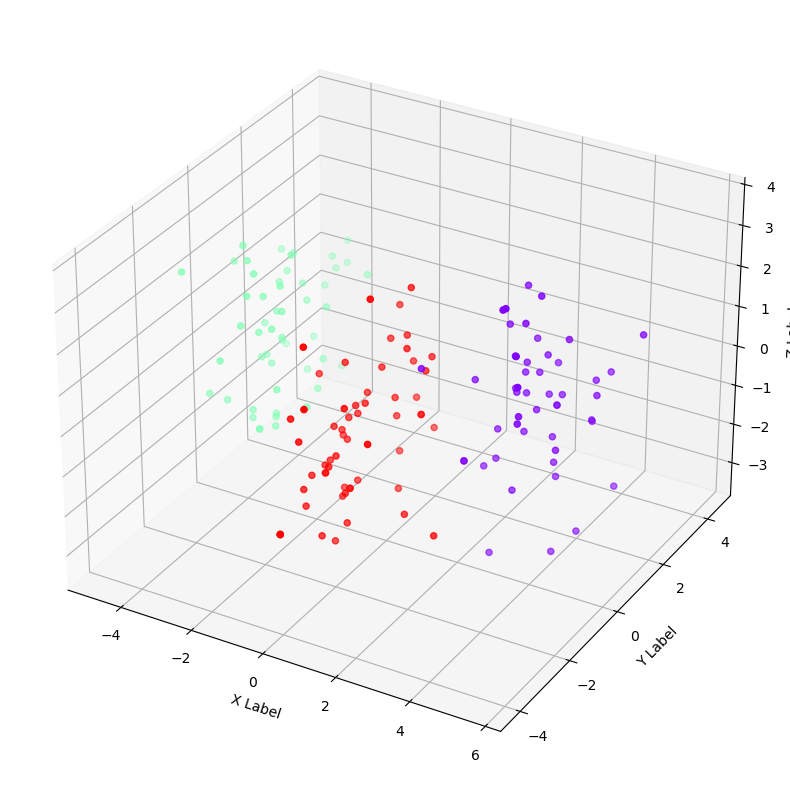

In [22]:
# plotting the results of the clustering
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(famd.row_coordinates(completedata)[0], famd.row_coordinates(completedata)[1], famd.row_coordinates(completedata)[2], c = kmeans.labels_, cmap = 'rainbow')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

In [23]:
# adding the label of the cluster at each sample
completedata['label'] = kmeans.labels_
completedata

,gender,marital,education,age,income,phq_1,phq_2,phq_3,phq_4,phq_5,...,gad_7,eheals_1,eheals_2,eheals_3,eheals_4,eheals_5,eheals_6,eheals_7,eheals_8,label
0,1,1,5.0,42.0,18000.0,0.0,0.0,1.0,0.0,0.0,...,0.0,3.0,5.0,3.0,2.0,1.0,0.0,2.0,2.0,1
1,3,1,18.0,51.0,23000.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,4.0,4.0,4.0,4.0,4.0,0.0,3.0,1
2,0,1,8.0,40.0,10000.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,4.0,2.0,4.0,3.0,3.0,4.0,0.0,1
3,0,5,25.0,19.0,31000.0,2.0,1.0,0.0,0.0,2.0,...,3.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,0
4,2,1,13.0,42.0,40000.0,0.0,0.0,0.0,0.0,1.0,...,0.0,5.0,5.0,0.0,0.0,5.0,5.0,5.0,4.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,2,0,18.0,29.0,25000.0,0.0,2.0,0.0,2.0,0.0,...,3.0,5.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,0
156,1,5,13.0,40.0,27000.0,2.0,1.0,2.0,0.0,2.0,...,2.0,3.0,5.0,5.0,5.0,5.0,0.0,3.0,5.0,2
157,0,0,13.0,40.0,26000.0,0.0,0.0,2.0,1.0,0.0,...,2.0,5.0,5.0,5.0,5.0,5.0,3.0,4.0,0.0,2
158,1,1,8.0,41.0,11000.0,0.0,0.0,1.0,0.0,0.0,...,1.0,4.0,3.0,3.0,4.0,1.0,3.0,4.0,4.0,1


## Statistical analysis (???)

In [25]:
# creating the summary of the various clusters using the mode
cluster0 = completedata[completedata['label'] == 0].mode().iloc[0]
cluster1 = completedata[completedata['label'] == 1].mode().iloc[0]
cluster2 = completedata[completedata['label'] == 2].mode().iloc[0]

clusterdata = pd.concat([cluster0, cluster1, cluster2], axis=1).transpose()
clusterdata = clusterdata.set_index('label')
catcluster = clusterdata[catcols].transpose()
catcluster

label,0.0,1.0,2.0
gender,1,1,2
marital,0,1,1
education,18.0,8.0,13.0


In [76]:
# creating a contingency tables with the clusters as samples and the categorical features as **well** features
columns = completedata.columns.drop('label')

# creating a 2x2 contingency table for each categorical feature
catcontingencytables = []
for col in catcols:
    catcontingencytables.append(pd.crosstab(completedata['label'], completedata[col]))
  
# adding 5 to all the values inside the contingency tables  
for table in catcontingencytables:
    table += 5
   
for table in catcontingencytables:
    display(table)

gender,0,1,2,3
label,,,,
0,16,20,14,19
1,14,22,16,21
2,21,13,22,22


marital,0,1,2,3,4,5
label,,,,,,
0,33,14,11,5,5,11
1,5,30,18,9,14,7
2,10,43,12,9,5,9


education,5.0,8.0,13.0,18.0,22.0,25.0
label,,,,,,
0,5,5,14,23,19,13
1,13,29,19,12,5,5
2,5,17,39,14,8,5


In [69]:
# performing chi2 test on the contingency tables
chi2results = []
for table in catcontingencytables:
    chi2results.append(chi2_contingency(table).pvalue)
    
significant = [pvalue < 0.05/3 for pvalue in chi2results]
significant


[False, True, True]

In [78]:
tablestokeep = []

for table in range(len(catcontingencytables)):
    if significant[table]:
        tablestokeep.append(catcontingencytables[table])
        
for table in tablestokeep:
    display(table)

marital,0,1,2,3,4,5
label,,,,,,
0,33,14,11,5,5,11
1,5,30,18,9,14,7
2,10,43,12,9,5,9


education,5.0,8.0,13.0,18.0,22.0,25.0
label,,,,,,
0,5,5,14,23,19,13
1,13,29,19,12,5,5
2,5,17,39,14,8,5
